<a href="https://colab.research.google.com/github/LeonimerMelo/CNNs/blob/Pretrained_CNNs/Transfer_Learning_%26_Fine_tuning_with_Xception_pre_trained_model_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Xception based Transfer Learning & Fine-tuning
---



O **Xception** é um modelo de rede neural profunda desenvolvido pelo Google em 2016. É uma variante do modelo **Inception**, mas com algumas mudanças significativas.

Arquitetura:

O Xception é uma rede neural convolucional que utiliza uma arquitetura de "separação espacial" (Spatial Separation), que é diferente da arquitetura tradicional de Inception.

- Camadas iniciais: convolução 2D, max pooling e normalização de batch.
- Camadas intermediárias: módulos Xception (separação espacial).
- Camadas finais: camada de classe, softmax e saída.

Módulos Xception:

Os módulos Xception são a principal inovação do modelo. Eles consistem em:

- Separação espacial: divide a entrada em duas partes, processa cada parte separadamente e, em seguida, combina as saídas.
- Convolução profunda: utiliza convoluções profundas (depthwise separable convolutions) para reduzir a complexidade.

Vantagens:

- Melhor desempenho em tarefas de classificação de imagens.
- Maior eficiência computacional em relação ao Inception.
- Capacidade de lidar com imagens de alta resolução.

Desvantagens:

- Maior complexidade em relação a outros modelos.
- Requer grande quantidade de dados de treinamento.

Aplicações:

- Classificação de imagens.
- Detecção de objetos.
- Segmentação de imagens.

Resultados:

- ImageNet (2016): 0,78% de erro top-5.
- CIFAR-10: 3,6% de erro.

O Xception é um modelo poderoso e eficiente para tarefas de visão computacional. Sua arquitetura inovadora e capacidade de lidar com imagens de alta resolução o tornam uma escolha popular para muitas aplicações.


###Comparação entre o Xception e outros modelos de redes neurais:

Modelos

1. VGG16
2. ResNet50
3. InceptionV3
4. MobileNet
5. Xception

Desempenho em ImageNet

1. VGG16: 0,92% de erro top-5
2. ResNet50: 0,74% de erro top-5
3. InceptionV3: 0,78% de erro top-5
4. MobileNet: 0,83% de erro top-5
5. Xception: 0,78% de erro top-5

Número de Parâmetros

1. VGG16: 138 milhões
2. ResNet50: 25 milhões
3. InceptionV3: 23 milhões
4. MobileNet: 4 milhões
5. Xception: 22 milhões

Velocidade de Inferência

1. VGG16: 50-60 FPS
2. ResNet50: 100-120 FPS
3. InceptionV3: 80-100 FPS
4. MobileNet: 200-250 FPS
5. Xception: 100-120 FPS

Características

1. VGG16: Rede neural profunda, convoluções 2D.
2. ResNet50: Rede neural residual, convoluções 2D.
3. InceptionV3: Rede neural com módulos Inception.
4. MobileNet: Rede neural leve, convoluções profundas.
5. Xception: Rede neural com módulos Xception.

O Xception se destaca por:

- Desempenho semelhante ao ResNet50 e InceptionV3.
- Número de parâmetros menor que o VGG16.
- Velocidade de inferência semelhante ao ResNet50.

No entanto:

- O MobileNet é mais leve e rápido.
- O ResNet50 é mais robusto e flexível.

A escolha do modelo depende do:

- Desempenho necessário.
- Tamanho do modelo.
- Velocidade de inferência.
- Complexidade do problema.


##Xception model

Xception is a mid-2016 architecture ([published in CVPR 2017](https://arxiv.org/abs/1610.02357)) that heavily relies on Depthwise Separable convolutions. It's commonly used in the computer vision community for image segmentation tasks.

Here's what it looks like (image taken from the original paper):

![xception_flow](https://s3-us-west-1.amazonaws.com/fchollet-public-colabs/xception_flow.png)

## Setup

In [ ]:
import numpy as np
import keras
from keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import time

In [ ]:
# função para plotar os gráficos da acurária e perda
def plot_acc_loss(h):
  plt.figure(figsize = (11,5))
  plt.subplot(1,2,1)
  plt.plot(h.history['loss'], label = 'Treino')
  plt.plot(h.history['val_loss'], label = 'Validação')
  plt.xlabel('Épocas')
  plt.ylabel('Função Custo')
  plt.title('loss')
  plt.xticks()
  plt.yticks()
  plt.legend()
  plt.grid()
  plt.subplot(1,2,2)
  plt.plot(h.history['binary_accuracy'], label = 'Treino')
  plt.plot(h.history['val_binary_accuracy'], label = 'Validação')
  plt.xlabel('Épocas')
  plt.ylabel('Acurácia')
  plt.title('accuracy')
  plt.xticks()
  plt.yticks()
  plt.legend()
  plt.tight_layout()
  plt.grid()
  plt.show()

# função para calcular o tempo de treinamento da rede
def processing_time(start_t, finish_t):
  a = finish_t - start_t
  if a < 0:
    print('Error! time negative!')
    return
  hora = 0
  min = a // 60
  seg = a % 60
  if min > 59:
    hora = min // 60
    min = min % 60
  if hora > 0:
    print("\nElapsed time:%ih%im%is"% (hora, min, seg))
  else:
    print("\nElapsed time:%im%is"% (min, seg))

#Transfer Learning

O aprendizado por transferência (**Transfer Learning**) consiste em aproveitar características aprendidas em um problema e usá-las em um novo problema semelhante. Por exemplo, recursos extraídos de um modelo que aprendeu a identificar **guaxinins** podem ser úteis para iniciar um modelo destinado a identificar **tanukis**.  

Esse método é especialmente útil quando seu conjunto de dados é pequeno demais para treinar um modelo do zero.  

O fluxo de trabalho mais comum no aprendizado por transferência no contexto de **deep learning** segue estas etapas:  

1. **Reutilizar camadas** de um modelo previamente treinado.  
2. **Congelar essas camadas**, para preservar as informações aprendidas e evitar que sejam alteradas durante o novo treinamento.  
3. **Adicionar novas camadas treináveis** sobre as camadas congeladas. Essas novas camadas aprenderão a transformar as características antigas em previsões para o novo conjunto de dados.  
4. **Treinar apenas as novas camadas** no novo conjunto de dados.  
5. (Opcional) **Fine-tuning**: descongelar parte ou todo o modelo obtido na etapa anterior e continuar o treinamento com uma **taxa de aprendizado muito baixa**. Isso pode melhorar os resultados ao ajustar as características pré-treinadas ao novo problema de forma incremental.  

Primeiro, abordaremos em detalhes a API do Keras para camadas treináveis, que é a base da maioria dos fluxos de trabalho de **Transfer Learning** e **Fine-Tuning**.  

Em seguida, demonstraremos um fluxo de trabalho típico, utilizando um modelo pré-treinado no conjunto de dados **ImageNet** e refinando-o para classificar imagens do conjunto **"cats vs dogs"** do Kaggle.  

Este conteúdo foi adaptado do livro
[Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python)
e do post de 2016
["building powerful image classification models using very little data"](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html).

Resumo do **Transfer Learning** e seu fluxo de trabalho. Os pontos mais importantes são:  
✅ Útil quando **o conjunto de dados é pequeno**.  
✅ Reutiliza conhecimento de **modelos pré-treinados**.  
✅ **Camadas congeladas** protegem os pesos aprendidos.  
✅ **Fine-tuning** pode melhorar resultados, mas deve ser feito **com cautela** para evitar overfitting.  

### Getting the data

First, let's fetch the cats vs. dogs dataset using TFDS. If you have your own dataset,
you'll probably want to use the utility
`keras.utils.image_dataset_from_directory` to generate similar labeled
 dataset objects from a set of images on disk filed into class-specific folders.

Transfer learning is most useful when working with very small datasets. To keep our
dataset small, we will use 40% of the original training data (25,000 images) for
 training, 10% for validation, and 10% for testing.

In [ ]:
#tfds.disable_progress_bar()
train_ds, validation_ds, test_ds = tfds.load(
    "cats_vs_dogs",
    # Reserve 10% for validation and 10% for test
    split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"],
    as_supervised=True,  # Include labels
)

print(f"Number of training samples: {train_ds.cardinality()}")
print(f"Number of validation samples: {validation_ds.cardinality()}")
print(f"Number of test samples: {test_ds.cardinality()}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.ZM77MW_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Number of training samples: 9305
Number of validation samples: 2326
Number of test samples: 2326


(316, 300, 3) 0


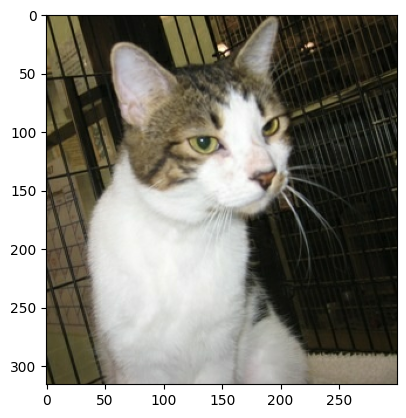

(500, 375, 3) 1


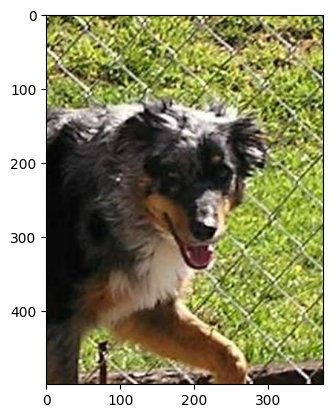

(426, 500, 3) 1


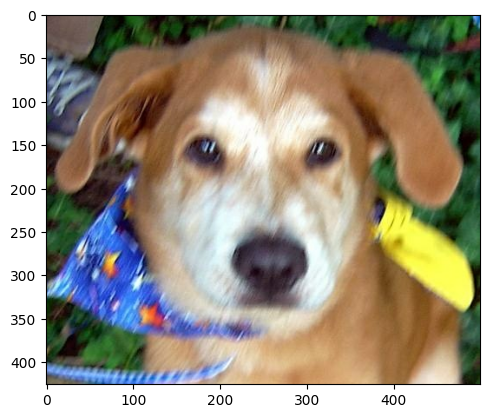

In [ ]:
# first two images
ds=test_ds.take(3)
for image, label in ds:  # example is (image, label)
  print(image.shape, int(label))
  plt.imshow(image)
  plt.show()

These are the first 9 images in the training dataset -- as you can see, they're all
different sizes.

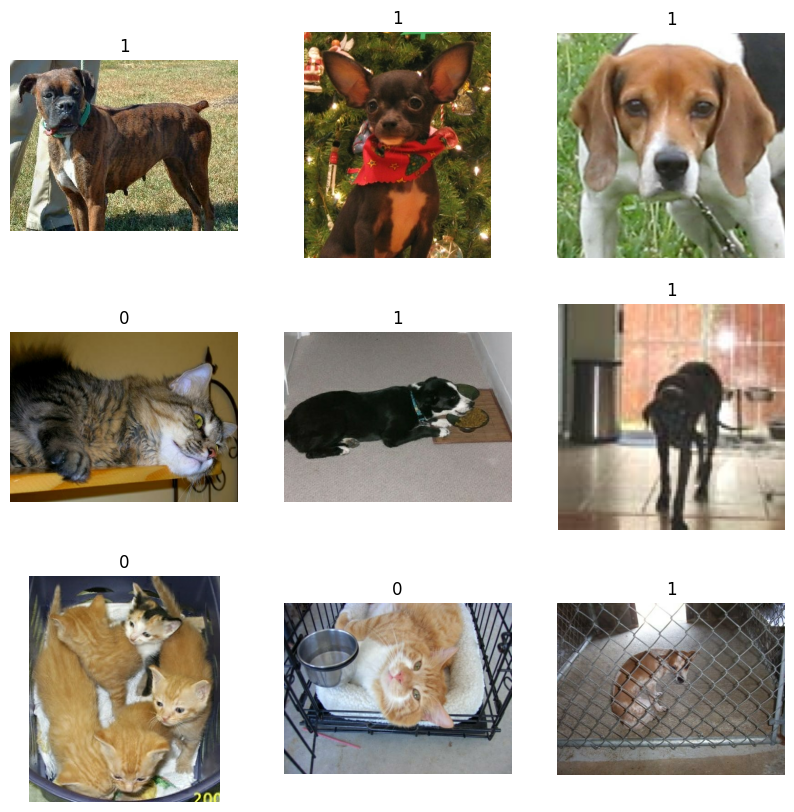

In [ ]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")
plt.show()

We can also see that label 1 is "dog" and label 0 is "cat".

### Standardizing the data

Our raw images have a variety of sizes. In addition, each pixel consists of 3 integer
values between 0 and 255 (RGB level values). This isn't a great fit for feeding a
neural network. We need to do 2 things:

- Standardize to a fixed image size. We pick 150x150.
- Normalize pixel values between -1 and 1. We'll do this using a `Normalization` layer as
part of the model itself.

In general, it's a good practice to develop models that take raw data as input, as
opposed to models that take already-preprocessed data. The reason being that, if your
model expects preprocessed data, any time you export your model to use it elsewhere
(in a web browser, in a mobile app), you'll need to reimplement the exact same
preprocessing pipeline. This gets very tricky very quickly. So we should do the least
 possible amount of preprocessing before hitting the model.

Here, we'll do image resizing in the data pipeline (because a deep neural network can
only process contiguous batches of data), and we'll do the input value scaling as part
of the model, when we create it.

Let's resize images to 150x150:

In [ ]:
resize_fn = keras.layers.Resizing(150, 150)

train_ds_r = train_ds.map(lambda x, y: (resize_fn(x), y))
validation_ds_r = validation_ds.map(lambda x, y: (resize_fn(x), y))
test_ds_r = test_ds.map(lambda x, y: (resize_fn(x), y))

In [ ]:
a=test_ds.take(1)
for image, label in a: print('before resizing:', image.shape)
a=train_ds_r.take(1)
for image, label in a: print('after resizing:', image.shape)

before resizing: (316, 300, 3)
after resizing: (150, 150, 3)


### Using random data augmentation

When you don't have a large image dataset, it's a good practice to artificially
introduce sample diversity by applying random yet realistic transformations to
the training images, such as random horizontal flipping or small random rotations. This
helps expose the model to different aspects of the training data while slowing down
overfitting.

In [ ]:
augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.4),
]

def data_augmentation(x):
    for layer in augmentation_layers:
        x = layer(x)
    return x

train_ds_a = train_ds_r.map(lambda x, y: (data_augmentation(x), y))

Let's batch the data and use prefetching to optimize loading speed.

In [ ]:
from tensorflow import data as tf_data

batch_size = 64

train_ds_p = train_ds_a.batch(batch_size).prefetch(tf_data.AUTOTUNE).cache()
validation_ds_p = validation_ds_r.batch(batch_size).prefetch(tf_data.AUTOTUNE).cache()
test_ds_p = test_ds_r.batch(batch_size).prefetch(tf_data.AUTOTUNE).cache()

Let's visualize what the first image of the first batch looks like after various random
 transformations:

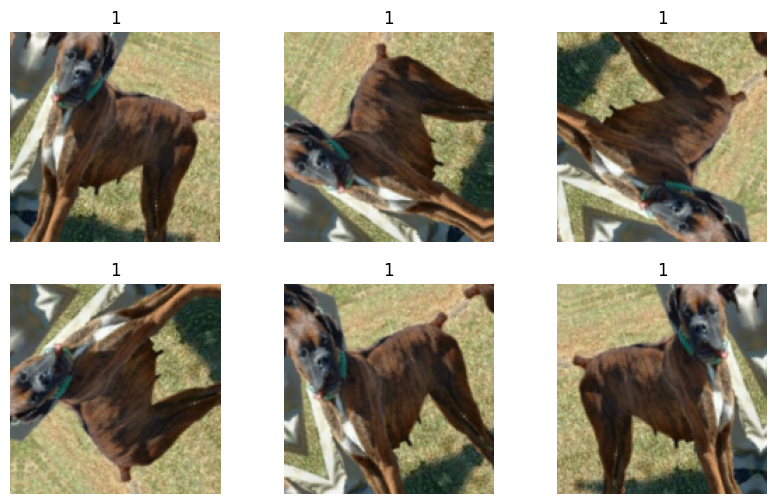

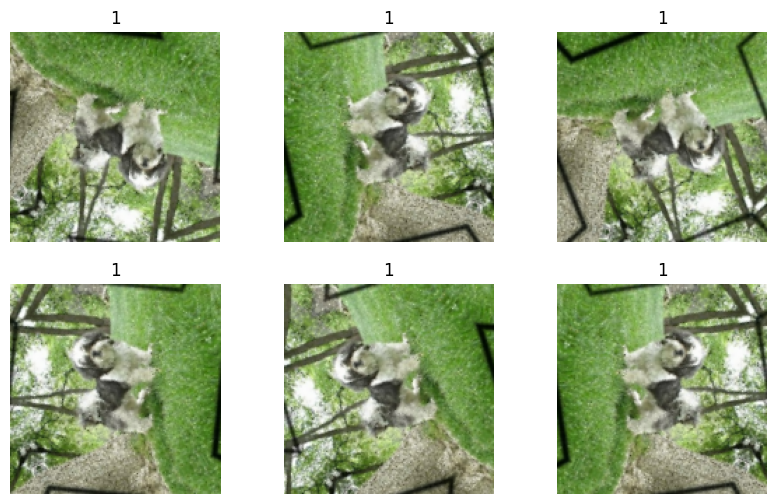

In [ ]:
for images, labels in train_ds_p.take(2):
    plt.figure(figsize=(10, 6))
    first_image = images[0]
    for i in range(6):
        ax = plt.subplot(2, 3, i + 1)
        augmented_image = data_augmentation(np.expand_dims(first_image, 0))
        plt.imshow(np.array(augmented_image[0]).astype("int32"))
        plt.title(int(labels[0]))
        plt.axis("off")

## The typical transfer-learning workflow

This leads us to how a typical transfer learning workflow can be implemented in Keras:

1. Instantiate a base model and load pre-trained weights into it.
2. Freeze all layers in the base model by setting `trainable = False`.
3. Create a new model on top of the output of one (or several) layers from the base
 model.
4. Train your new model on your new dataset.

Note that an alternative, more lightweight workflow could also be:

1. Instantiate a base model and load pre-trained weights into it.
2. Run your new dataset through it and record the output of one (or several) layers
 from the base model. This is called **feature extraction**.
3. Use that output as input data for a new, smaller model.

A key advantage of that second workflow is that you only run the base model once on
 your data, rather than once per epoch of training. So it's a lot faster & cheaper.

An issue with that second workflow, though, is that it doesn't allow you to dynamically
modify the input data of your new model during training, which is required when doing
data augmentation, for instance. Transfer learning is typically used for tasks when
your new dataset has too little data to train a full-scale model from scratch, and in
such scenarios data augmentation is very important. So in what follows, we will focus
 on the first workflow.

Here's what the first workflow looks like in Keras:

## Build a model

Now let's built a model that follows the blueprint we've explained earlier.

Note that:

- We add a `Rescaling` layer to scale input values (initially in the `[0, 255]`
 range) to the `[-1, 1]` range.
- We add a `Dropout` layer before the classification layer, for regularization.
- We make sure to pass `training=False` when calling the base model, so that
it runs in inference mode, so that batchnorm statistics don't get updated
even after we unfreeze the base model for fine-tuning.

In [ ]:
# First, instantiate a base model with pre-trained weights.
base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False,  # Do not include the ImageNet classifier at the top.
)

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(150, 150, 3))

# Pre-trained Xception weights requires that input be scaled
# from (0, 255) to a range of (-1., +1.), the rescaling layer
# outputs: `(inputs * scale) + offset`
scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(inputs)

# Create a new model on top.
# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary(show_trainable=True)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer_1 (InputLayer)          │ (None, 150, 150, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ rescaling (Rescaling)               │ (None, 150, 150, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ xception (Functional)               │ (None, 5, 5, 2048)           │    20,861,480 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ global_average_pooling2d            │ (None, 2048)                 │             0 │    -    │
│ (GlobalAveragePooling2D)            │                              │               │         │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dropout (Dropout)                   │ (None, 2048)                 │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense (Dense)                       │ (None, 1)                    │         2,049 │    Y    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 20,863,529 (79.59 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [ ]:
# model compile
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

### Train the top layer

In [ ]:
# início do treinamento da rede
start_time = time.time()
epochs = 6
print("Fitting the top layer of the model")
# Train the model on new data.
h1 = model.fit(train_ds_p, epochs=epochs, validation_data=validation_ds_p)
# tempo total de treinamento da rede
processing_time(start_time, time.time())

Fitting the top layer of the model
Epoch 1/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 84s 470ms/step - binary_accuracy: 0.7755 - loss: 0.4215 - val_binary_accuracy: 0.9626 - val_loss: 0.1095
Epoch 2/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - binary_accuracy: 0.8792 - loss: 0.2578 - val_binary_accuracy: 0.9643 - val_loss: 0.1045
Epoch 3/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - binary_accuracy: 0.8947 - loss: 0.2366 - val_binary_accuracy: 0.9652 - val_loss: 0.1009
Epoch 4/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 19s 129ms/step - binary_accuracy: 0.8987 - loss: 0.2243 - val_binary_accuracy: 0.9660 - val_loss: 0.1013
Epoch 5/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 18s 126ms/step - binary_accuracy: 0.9035 - loss: 0.2195 - val_binary_accuracy: 0.9656 - val_loss: 0.0988
Epoch 6/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 18s 126ms/step - binary_accuracy: 0.9049 - loss: 0.2093 - val_binary_accuracy: 0.9660 - val_loss: 0.0972

Elapsed time:2m59s


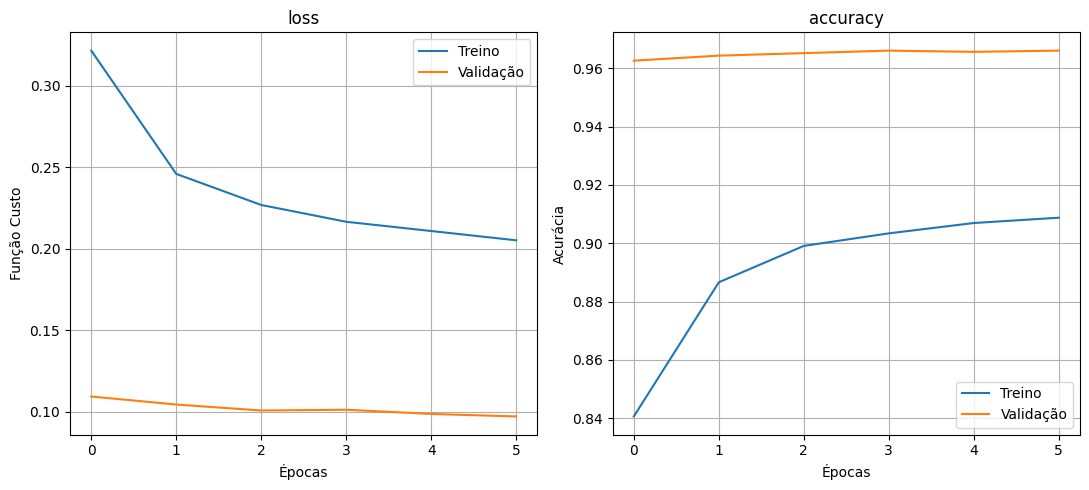

In [ ]:
plot_acc_loss(h1)

In [ ]:
# evaluate and print test accuracy and loss
score = model.evaluate(test_ds_p)
print('\nTest accuracy: %.1f%%' % (score[1]*100))
print('Test loss: %.3f' % (score[0]))

37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - binary_accuracy: 0.9711 - loss: 0.0775

Test accuracy: 96.5%
Test loss: 0.094


#Fine-tuning

Ajuste fino (Fine-tuning) de todo o modelo. Depois que seu modelo tiver convergido com os novos dados, você pode tentar descongelar toda ou parte da base do modelo e treinar novamente o modelo inteiro de ponta a ponta com uma taxa de aprendizado muito baixa.  

Essa é uma etapa opcional que pode trazer melhorias incrementais. No entanto, também pode levar ao overfitting rapidamente — tenha isso em mente.  

É essencial realizar essa etapa **apenas depois** que o modelo com as camadas congeladas tiver sido treinado até a convergência. Se você misturar camadas treináveis inicializadas aleatoriamente com camadas treináveis que já contêm características pré-treinadas, as camadas aleatórias causarão atualizações de gradiente muito grandes durante o treinamento, o que pode destruir as características pré-treinadas.  

Também é fundamental usar uma taxa de aprendizado muito baixa nessa fase, pois agora você está treinando um modelo muito maior do que na primeira etapa, geralmente com um conjunto de dados pequeno.  
Como resultado, há um alto risco de overfitting se você aplicar atualizações de pesos muito grandes. Nesta etapa, o objetivo é apenas reajustar os pesos pré-treinados de maneira incremental.  

Deve-se ter em mente a importância de realizar essa etapa **somente após** o modelo já ter convergido com as camadas congeladas. O maior risco aqui é o **overfitting**, especialmente porque o conjunto de dados costuma ser pequeno. A recomendação de usar uma **taxa de aprendizado muito baixa** é crucial para evitar que grandes atualizações de gradiente destruam as características aprendidas.  

### **Nota importante sobre `compile()` e `trainable`**  

Chamar `compile()` em um modelo serve para "congelar" o comportamento desse modelo. Isso significa que os valores do atributo `trainable` no momento da compilação **serão mantidos durante toda a vida útil do modelo**, até que `compile()` seja chamado novamente. Portanto, se você modificar qualquer valor de `trainable`, certifique-se de chamar `compile()` novamente para que suas alterações sejam consideradas.  

### **Notas importantes sobre a camada `BatchNormalization`**  

Muitos modelos de visão computacional contêm camadas `BatchNormalization`, que são um caso especial em vários aspectos. Aqui estão alguns pontos importantes a serem lembrados:  

- A `BatchNormalization` possui **dois pesos não treináveis** que são atualizados durante o treinamento. Essas variáveis rastreiam a **média** e a **variância** das entradas.  
- Quando você define `bn_layer.trainable = False`, a camada **passa a operar no modo de inferência** e **não atualiza** suas estatísticas de média e variância. Isso não acontece com outras camadas em geral, pois, em geral, **a treinabilidade dos pesos e os modos de inferência/treinamento são conceitos independentes** ([leia mais aqui](https://keras.io/getting_started/faq/#whats-the-difference-between-the-training-argument-in-call-and-the-trainable-attribute)). No entanto, no caso específico da `BatchNormalization`, esses dois conceitos estão interligados.  
- Ao descongelar um modelo para realizar **fine-tuning**, é recomendável **manter as camadas `BatchNormalization` no modo de inferência**. Isso pode ser feito passando `training=False` ao chamar o modelo base.  
  - Se isso não for feito, as atualizações aplicadas aos pesos não treináveis da `BatchNormalization` podem **destruir o que o modelo aprendeu anteriormente**, prejudicando o desempenho.  

---

### **Comentários e Explicação**  

✅ O ponto crítico aqui é que **`compile()` deve ser chamado novamente** se `trainable` for alterado.  
✅ `BatchNormalization` pode ser problemática no **fine-tuning**, porque seu comportamento muda quando treinável ou não.  
✅ Se um modelo pré-treinado for **descongelado** sem cuidado, `BatchNormalization` pode acabar destruindo as características aprendidas.  

Se estiver trabalhando com **fine-tuning**, esse é um dos detalhes mais importantes para evitar perda de desempenho.

##Modo de inferência (evaluation mode)
Está relacionado com **Batch Normalization (BatchNorm) e Dropout** durante a inferência em redes neurais.  

### O que significa?  
Quando um modelo está no **modo de inferência (evaluation mode)**, algumas camadas funcionam de maneira diferente do que no treinamento:  

1. **BatchNorm** – Em vez de calcular a média e o desvio padrão do batch atual (como faz no treinamento), ele usa os valores acumulados durante o treinamento.  
2. **Dropout** – Fica desativado, ou seja, não remove unidades aleatórias como acontece no treinamento.  

Se um modelo pré-treinado **permanece em modo de inferência**, significa que essas camadas continuam se comportando dessa maneira, mesmo que você tente fazer fine-tuning. Isso pode ser um problema, pois as **estatísticas da BatchNorm podem não se adaptar bem aos novos dados**.  

### Solução no Fine-Tuning  
Se estiver usando PyTorch, pode verificar e alterar o modo do modelo:  
```python
model.train()  # Ativa o modo de treinamento, permitindo atualizar BatchNorm e Dropout
model.eval()   # Ativa o modo de inferência
```  
No TensorFlow/Keras, ao compilar e treinar o modelo, as camadas geralmente se ajustam automaticamente, mas algumas precisam ser configuradas manualmente.  

##Batch Normalization Layers (BatchNorm)
**Batch Normalization Layers (Camadas de Normalização em Lote)** são camadas usadas em redes neurais para estabilizar e acelerar o treinamento. Elas normalizam a ativação das camadas intermediárias durante o treinamento, reduzindo o desvio na distribuição dos dados conforme passam pela rede.  

### Como funcionam?  
1. **Normalização**: Para cada mini-lote de entrada, a camada calcula a média e o desvio padrão das ativações e normaliza os valores.  
2. **Escalonamento e Deslocamento**: Após a normalização, dois parâmetros treináveis ($\gamma$ e $\beta$) permitem que o modelo ajuste dinamicamente a distribuição dos dados normalizados.  
3. **Impacto nos Gradientes**: Ajuda a suavizar o fluxo do gradiente, evitando problemas como **exploding gradients** (gradientes explosivos) e **vanishing gradients** (gradientes desaparecendo).  

### Benefícios:  
✅ **Acelera o treinamento** – Reduz a dependência de inicialização de pesos e permite usar taxas de aprendizado maiores.  
✅ **Reduz a sensibilidade à inicialização de pesos** – Torna o treinamento mais estável.  
✅ **Diminui o overfitting** – Funciona como uma leve regularização.  

### Cuidado ao usar BatchNorm no Fine-Tuning  
Se você estiver ajustando um modelo pré-treinado, precisa decidir se vai:  
1. **Manter as estatísticas fixas** – Usar os valores aprendidos do modelo original (congelar a camada).  
2. **Atualizar durante o treinamento** – Ajustar para os novos dados, mas isso pode introduzir instabilidade, especialmente em conjuntos de dados pequenos.  

## An end-to-end example: fine-tuning an image classification model on a cats vs. dogs dataset

To solidify these concepts, let's walk you through a concrete end-to-end transfer
learning & fine-tuning example. We will load the Xception model, pre-trained on
 ImageNet, and use it on the Kaggle "cats vs. dogs" classification dataset.

Finally, let's unfreeze the base model and **train the entire model end-to-end** with a low
 learning rate.

Importantly, although the base model becomes trainable, it is still running in
inference mode since we passed `training=False` when calling it when we built the
model. This means that the batch normalization layers inside won't update their batch
statistics. If they did, they would wreck havoc on the representations learned by the
 model so far.

In [ ]:
# Clone the model
#model_fine_tuning = keras.models.clone_model(model_transf_learn)

In [ ]:
# Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when calling it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.
base_model.trainable = True
model.summary(show_trainable=True)

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate!!
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer_1 (InputLayer)          │ (None, 150, 150, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ rescaling (Rescaling)               │ (None, 150, 150, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ xception (Functional)               │ (None, 5, 5, 2048)           │    20,861,480 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ global_average_pooling2d            │ (None, 2048)                 │             0 │    -    │
│ (GlobalAveragePooling2D)            │                              │               │         │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dropout (Dropout)                   │ (None, 2048)                 │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense (Dense)                       │ (None, 1)                    │         2,049 │    Y    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 20,867,629 (79.60 MB)

 Trainable params: 20,809,001 (79.38 MB)

 Non-trainable params: 54,528 (213.00 KB)

 Optimizer params: 4,100 (16.02 KB)

In [ ]:
# início do treinamento da rede
start_time = time.time()
epochs = 4
print("Fitting the end-to-end model")
h2 = model.fit(train_ds_p, epochs=epochs, validation_data=validation_ds_p)
# tempo total de treinamento da rede
processing_time(start_time, time.time())

Fitting the end-to-end model
Epoch 1/4
146/146 ━━━━━━━━━━━━━━━━━━━━ 136s 573ms/step - binary_accuracy: 0.8039 - loss: 0.4473 - val_binary_accuracy: 0.9609 - val_loss: 0.1170
Epoch 2/4
146/146 ━━━━━━━━━━━━━━━━━━━━ 62s 426ms/step - binary_accuracy: 0.9012 - loss: 0.2548 - val_binary_accuracy: 0.9574 - val_loss: 0.1200
Epoch 3/4
146/146 ━━━━━━━━━━━━━━━━━━━━ 61s 418ms/step - binary_accuracy: 0.9417 - loss: 0.1721 - val_binary_accuracy: 0.9587 - val_loss: 0.1168
Epoch 4/4
146/146 ━━━━━━━━━━━━━━━━━━━━ 61s 418ms/step - binary_accuracy: 0.9628 - loss: 0.1175 - val_binary_accuracy: 0.9587 - val_loss: 0.1127

Elapsed time:5m20s


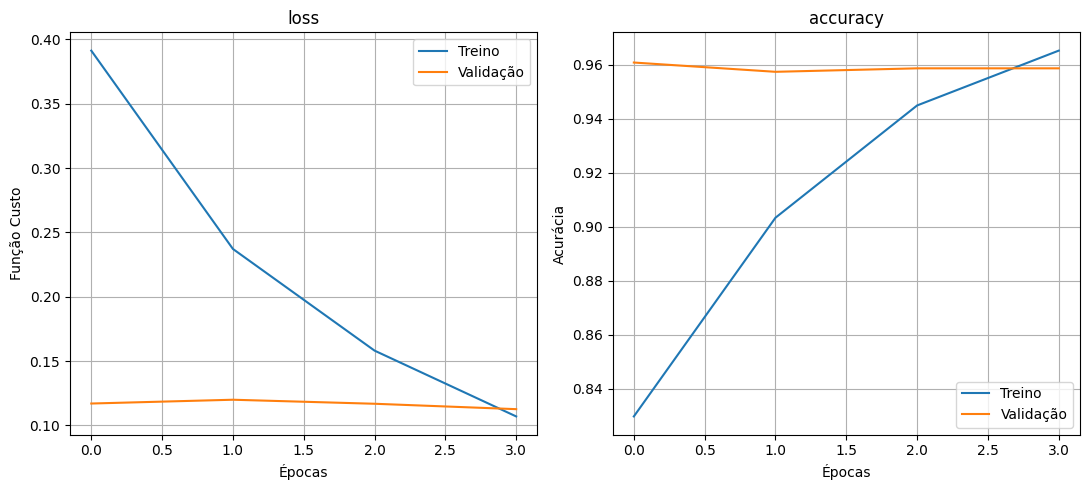

In [ ]:
plot_acc_loss(h2)

In [ ]:
# evaluate and print test accuracy and loss
score = model.evaluate(test_ds_p)
print('\nTest accuracy: %.1f%%' % (score[1]*100))
print('Test loss: %.3f' % (score[0]))

37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - binary_accuracy: 0.9574 - loss: 0.1169

Test accuracy: 95.4%
Test loss: 0.127


##Exercícios
1. Melhorar do desempenho, treinando com mais épocas (10 e 20 épocas) e comparar os resultados.
1. Implementar uma rotina para fazer o pré-processamento de imagens deixando compatível com a camada de entrada da rede.
1. Baixar 10 imagens de gatos e cachorros cada e fazer a predição.
1. Utilize o banco de dados [horses_or_humans](https://www.tensorflow.org/datasets/catalog/horses_or_humans) e verifique e compare o desempenho da rede.
1. Baixar 10 images de cavalos e humanos e fazer as predições. Verificar o desempenho da rede.

##Referências
[1] https://www.tensorflow.org/guide/keras/transfer_learning

[2] [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python)

[3] [Building powerful image classification models using very little data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)

[4] https://www.tensorflow.org/datasets

[5] https://www.tensorflow.org/datasets/catalog/cats_vs_dogs

[6] https://www.tensorflow.org/datasets/overview